# Essential Libraries

In [1]:
!pip install tensorflow
!pip install --upgrade tensorflow-gpu==2.0
!pip install nltk 
!pip install gensim

!pip install spacy
!pip install plotly
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install wordcloud
!pip install jupyterthemes
!pip install sklearn

import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
nltk.download('stopwords')

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0 (from versions: 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.0


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sridharmalladi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sridharmalladi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
from collections import Counter
import operator
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, TimeDistributed, RepeatVector, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

# Loading the Dataset

In [5]:
df_english = pd.read_csv('vocab_en.csv', sep = '\t', names = ['english'])
df_french = pd.read_csv('vocab_fr.csv', sep = '\t', names = ['french'])
df_english.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137860 entries, 0 to 137859
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   english  137860 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [6]:
df_french.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137860 entries, 0 to 137859
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   french  137860 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [7]:
df = pd.DataFrame([df_english['english'],df_french['french']])
df = df.T
df

english  \
0       new jersey is sometimes quiet during autumn , ...   
1       the united states is usually chilly during jul...   
2       california is usually quiet during march , and...   
3       the united states is sometimes mild during jun...   
4       your least liked fruit is the grape , but my l...   
...                                                   ...   
137855  france is never busy during march , and it is ...   
137856  india is sometimes beautiful during spring , a...   
137857  india is never wet during summer , but it is s...   
137858  france is never chilly during january , but it...   
137859  the orange is her favorite fruit , but the ban...   

                                                   french  
0       new jersey est parfois calme pendant l' automn...  
1       les états-unis est généralement froid en juill...  
2       california est généralement calme en mars , et...  
3       les états-unis est parfois légère en juin , et...  
4       votre moins aimé fruit est le raisin , mais mo...  
...                                                   ...  
137855  la france est jamais occupée en mars , et il e...  
137856  l' inde est parfois belle au printemps , et il...  
137857  l' inde est jamais mouillé pendant l' été , ma...  
137858  la france est jamais froid en janvier , mais i...  
137859  l'orange est son fruit préféré , mais la banan...  

[137860 rows x 2 columns]

## Cleaning the Data

In [8]:
def remove_punc(x):
    return re.sub('[!#?,.:";"]', "", x)

df['french'] = df['french'].apply(remove_punc)
df['english'] = df['english'].apply(remove_punc)

In [9]:
english_words = []
for i in df['english'].values:
    for j in i.split(" "):
        english_words.append(j)
english_words = list(set(english_words))
english_words = english_words[1:]

len(english_words)

199

In [10]:
french_words = []
for i in df['french'].values:
    for j in i.split(" "):
        french_words.append(j)
french_words = list(set(french_words))
french_words = french_words[1:]

len(french_words)

350

In [11]:
english_words

['dry',
 'elephant',
 'cats',
 'winter',
 "isn't",
 'chinese',
 'apple',
 'the',
 'tower',
 'would',
 'portuguese',
 'rabbit',
 'apples',
 'where',
 'summer',
 'hot',
 'she',
 'little',
 'translating',
 'next',
 'was',
 'never',
 'grapefruit',
 'a',
 'going',
 'mouse',
 'drove',
 'difficult',
 'spring',
 'green',
 'were',
 'snowy',
 "it's",
 'they',
 'might',
 'did',
 'lion',
 'snakes',
 'lemons',
 'our',
 'grapes',
 'lake',
 'sharks',
 'banana',
 'new',
 'least',
 'car',
 'during',
 'lime',
 'pleasant',
 'december',
 'lemon',
 'between',
 'her',
 'fruit',
 'pears',
 'wonderful',
 'go',
 'birds',
 'has',
 'animal',
 'beautiful',
 'monkey',
 'weather',
 'august',
 'september',
 'autumn',
 'peaches',
 'thinks',
 'dislike',
 'sometimes',
 'old',
 'we',
 'limes',
 'field',
 'their',
 'but',
 'favorite',
 'october',
 'oranges',
 'want',
 'that',
 'rabbits',
 'strawberries',
 'grocery',
 'likes',
 'he',
 'usually',
 'been',
 'i',
 'like',
 'and',
 'elephants',
 'bear',
 'wanted',
 'eiffel',


## Visualization of DataSet

In [12]:
words = []
for i in df['english']:
    for word in i.split():
        words.append(word)
    
english_words_counts = Counter(words)

english_words_counts = sorted(english_words_counts.items(), key = operator.itemgetter(1), reverse = True)

In [13]:
english_words_counts

[('is', 205858),
 ('in', 75525),
 ('it', 75137),
 ('during', 74933),
 ('the', 67628),
 ('but', 63987),
 ('and', 59850),
 ('sometimes', 37746),
 ('usually', 37507),
 ('never', 37500),
 ('favorite', 28332),
 ('least', 27564),
 ('fruit', 27192),
 ('most', 14934),
 ('loved', 14166),
 ('liked', 14046),
 ('new', 12197),
 ('paris', 11334),
 ('india', 11277),
 ('united', 11270),
 ('states', 11270),
 ('california', 11250),
 ('jersey', 11225),
 ('france', 11170),
 ('china', 10953),
 ('he', 10786),
 ('she', 10786),
 ('grapefruit', 10692),
 ('your', 9734),
 ('my', 9700),
 ('his', 9700),
 ('her', 9700),
 ('fall', 9134),
 ('june', 9133),
 ('spring', 9102),
 ('january', 9090),
 ('winter', 9038),
 ('march', 9023),
 ('autumn', 9004),
 ('may', 8995),
 ('nice', 8984),
 ('september', 8958),
 ('july', 8956),
 ('april', 8954),
 ('november', 8951),
 ('summer', 8948),
 ('december', 8945),
 ('february', 8942),
 ('our', 8932),
 ('their', 8932),
 ('freezing', 8928),
 ('pleasant', 8916),
 ('beautiful', 8915),
 ('

In [14]:
english_words = []
english_counts = []
for i in range(len(english_words_counts)):
    english_words.append(english_words_counts[i][0])
    english_counts.append(english_words_counts[i][1])

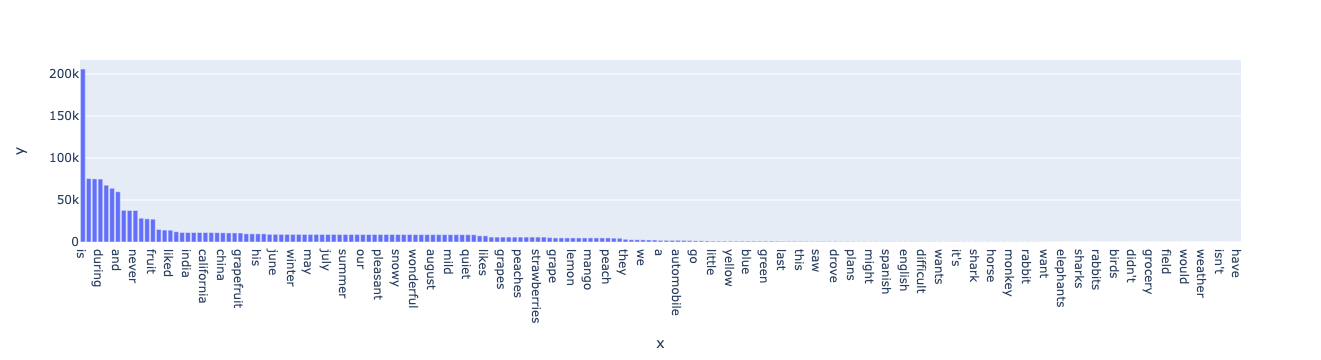

In [15]:
fig = px.bar(x = english_words, y = english_counts)
fig.show()

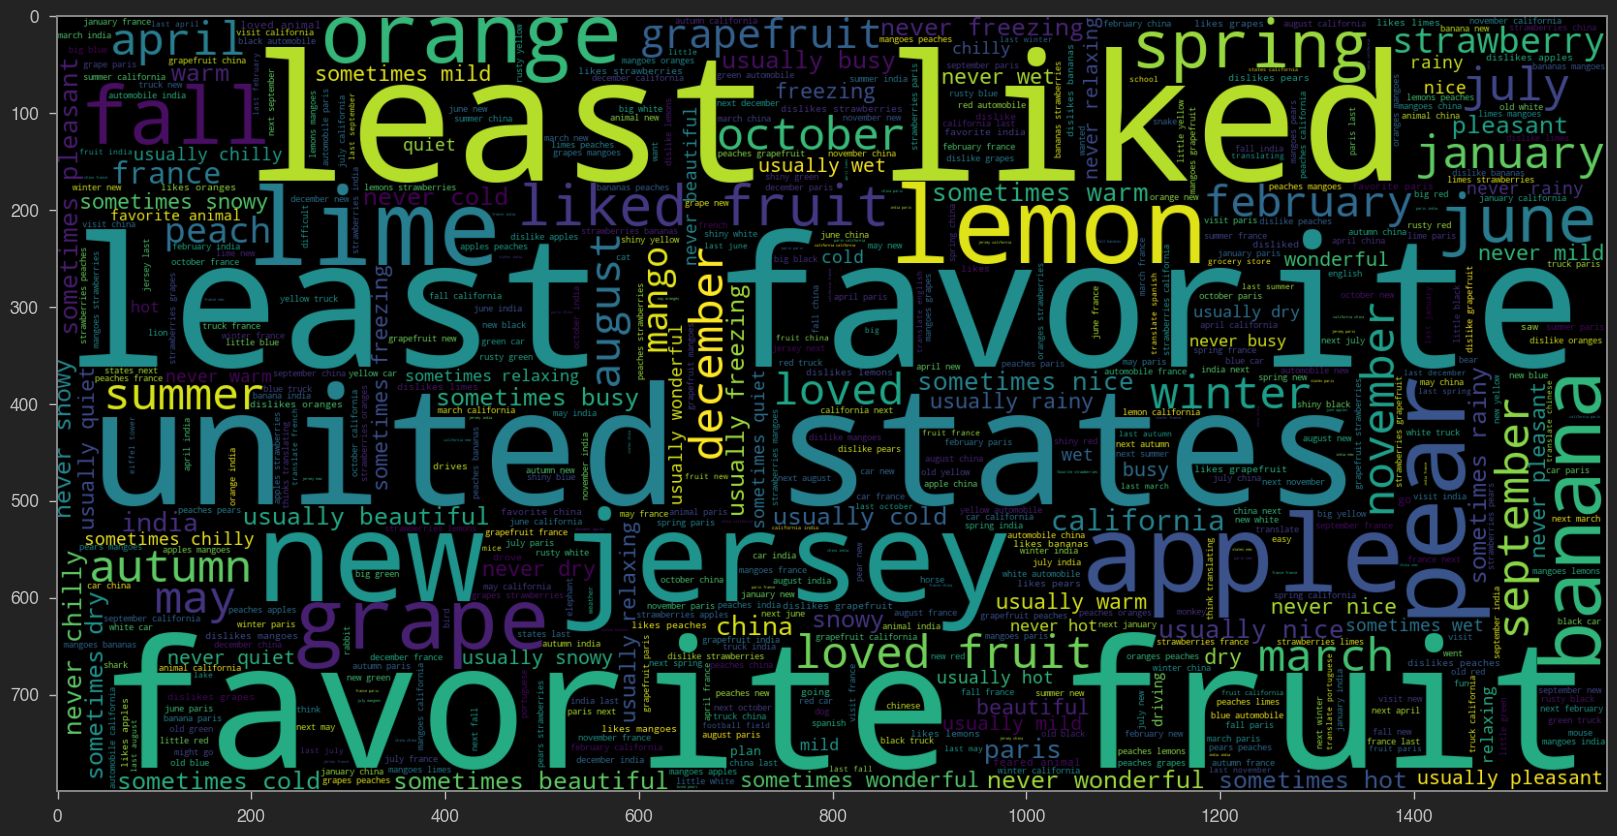

In [16]:
plt.figure(figsize = (20, 20))
wc = WordCloud(max_words = 2000, width = 1600, height = 800).generate(" ".join(df.english))


plt.imshow(wc, interpolation='bilinear')

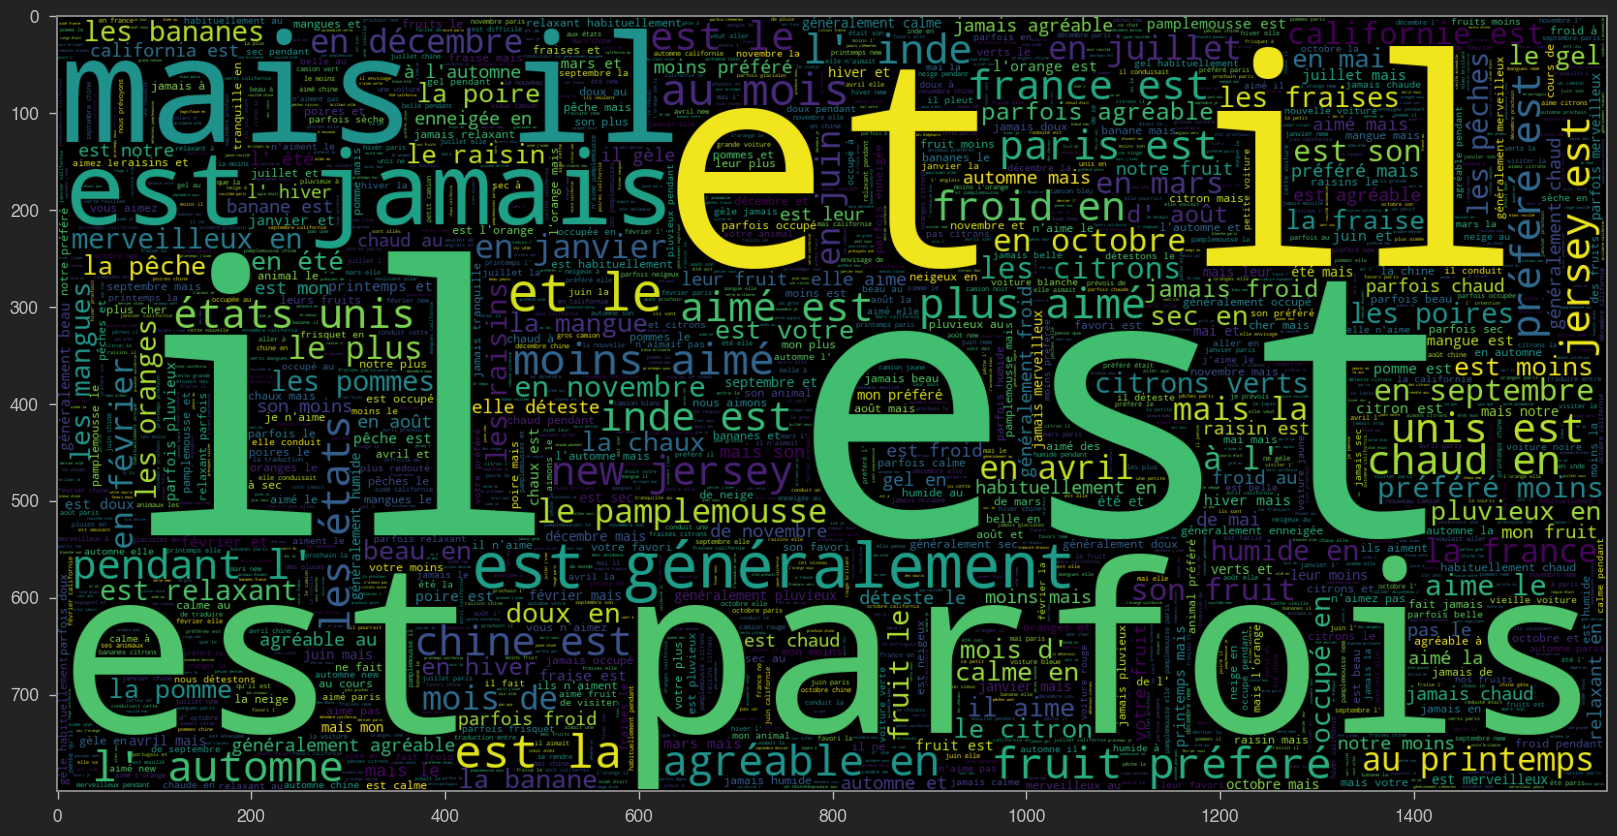

In [17]:
plt.figure(figsize = (20, 20))
wc = WordCloud(max_words = 2000, width = 1600, height = 800).generate(" ".join(df.french))


plt.imshow(wc, interpolation='bilinear')

In [18]:
maxlen_english = 0
for doc in df.english:
    tokens = nltk.word_tokenize(doc)
    if maxlen_english < len(tokens):
        maxlen_english = len(tokens)
maxlen_english

15

In [19]:
maxlen_french = 0
for doc in df.french:
    tokens = nltk.word_tokenize(doc)
    if maxlen_french< len(tokens):
        maxlen_french = len(tokens)
maxlen_french

23

## PREPARING THE DATA BY PERFORMING TOKENIZING 

In [20]:
def tokenize_and_pad(x, maxlen):
    tokenizer = Tokenizer(char_level = False)
    tokenizer.fit_on_texts(x)
    sequences = tokenizer.texts_to_sequences(x)
    padded = pad_sequences(sequences, maxlen = maxlen, padding = 'post')  #TO MAKE LENGTH OF EACH TOKENIZED TEXT EQUAL
    return tokenizer, sequences, padded

x_tokenizer, x_sequences, x_padded = tokenize_and_pad(df.english, maxlen_english)
y_tokenizer, y_sequences, y_padded = tokenize_and_pad(df.french, maxlen_french)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_padded, y_padded, test_size = 0.1)

## BUILDING AND TRAINING THE LSTM MODEL

In [22]:
english_vocab_size = len(english_words) + 1
french_vocab_size = len(french_words) + 1

# SEQUENTIAL MODEL
model = Sequential()

# ADDING EMBEDDING LAYER

model.add(Embedding(english_vocab_size, 256, input_length = maxlen_english, mask_zero = True))
model.add(LSTM(256))

# DECODER
# ADDING REPEAT VECTOR

model.add(RepeatVector(maxlen_french))
model.add(LSTM(256, return_sequences = True))
model.add(TimeDistributed(Dense(french_vocab_size, activation = 'softmax')))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 256)           51200     
                                                                 
 lstm (LSTM)                 (None, 256)               525312    
                                                                 
 repeat_vector (RepeatVecto  (None, 23, 256)           0         
 r)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 23, 256)           525312    
                                                                 
 time_distributed (TimeDist  (None, 23, 351)           90207     
 ributed)                                                        
                                                                 
Total params: 1192031 (4.55 MB)
Trainable params: 119203

In [23]:
y_train = np.expand_dims(y_train, axis = 2)
y_train.shape

(124074, 23, 1)

In [24]:
model.fit(X_train, y_train, batch_size = 1024, validation_split = 0.1, epochs = 15)

Epoch 1/15
110/110 [==============================] - 58s 511ms/step - loss: 2.7247 - accuracy: 0.4954 - val_loss: 2.1166 - val_accuracy: 0.5384
Epoch 2/15
110/110 [==============================] - 56s 514ms/step - loss: 1.8753 - accuracy: 0.5741 - val_loss: 1.6229 - val_accuracy: 0.5949
Epoch 3/15
110/110 [==============================] - 58s 523ms/step - loss: 1.5074 - accuracy: 0.6156 - val_loss: 1.3945 - val_accuracy: 0.6357
Epoch 4/15
110/110 [==============================] - 58s 529ms/step - loss: 1.3012 - accuracy: 0.6531 - val_loss: 1.2103 - val_accuracy: 0.6687
Epoch 5/15
110/110 [==============================] - 59s 532ms/step - loss: 1.1205 - accuracy: 0.6887 - val_loss: 1.0537 - val_accuracy: 0.7033
Epoch 6/15
110/110 [==============================] - 60s 546ms/step - loss: 0.9614 - accuracy: 0.7285 - val_loss: 0.9126 - val_accuracy: 0.7368
Epoch 7/15
110/110 [==============================] - 60s 549ms/step - loss: 0.8472 - accuracy: 0.7571 - val_loss: 0.7965 - val_ac

In [26]:
model.save('my_model.keras')

## Assess Trained Model Performance

In [33]:
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, LSTM, RepeatVector, TimeDistributed, Dense

# Assuming you have loaded your data into a DataFrame named 'df'
# Make sure 'df' contains 'english' and 'french' columns

# Define the maximum sequence lengths
maxlen_english =  30
maxlen_french =  40

# Define a function to tokenize and pad the data
def tokenize_and_pad(x, maxlen):
    tokenizer = Tokenizer(char_level=False)
    tokenizer.fit_on_texts(x)
    sequences = tokenizer.texts_to_sequences(x)
    padded = pad_sequences(sequences, maxlen=maxlen, padding='post')
    return tokenizer, sequences, padded

# Tokenize and pad the English and French data
x_tokenizer, x_sequences, x_padded = tokenize_and_pad(df.english, maxlen_english)
y_tokenizer, y_sequences, y_padded = tokenize_and_pad(df.french, maxlen_french)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_padded, y_padded, test_size=0.1)

# Define vocabulary sizes for English and French
english_vocab_size = len(x_tokenizer.word_index) + 1
french_vocab_size = len(y_tokenizer.word_index) + 1

# Build the LSTM model
model = Sequential()

# Adding the embedding layer
model.add(Embedding(english_vocab_size, 256, input_length=maxlen_english, mask_zero=True))
model.add(LSTM(256))

# Decoder
# Adding the repeat vector
model.add(RepeatVector(maxlen_french))
model.add(LSTM(256, return_sequences=True))
model.add(TimeDistributed(Dense(french_vocab_size, activation='softmax')))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model with your training data
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 30, 256)           51200     
                                                                 
 lstm_2 (LSTM)               (None, 256)               525312    
                                                                 
 repeat_vector_1 (RepeatVec  (None, 40, 256)           0         
 tor)                                                            
                                                                 
 lstm_3 (LSTM)               (None, 40, 256)           525312    
                                                                 
 time_distributed_1 (TimeDi  (None, 40, 345)           88665     
 stributed)                                                      
                                                                 
Total params: 1190489 (4.54 MB)
Trainable params: 1190

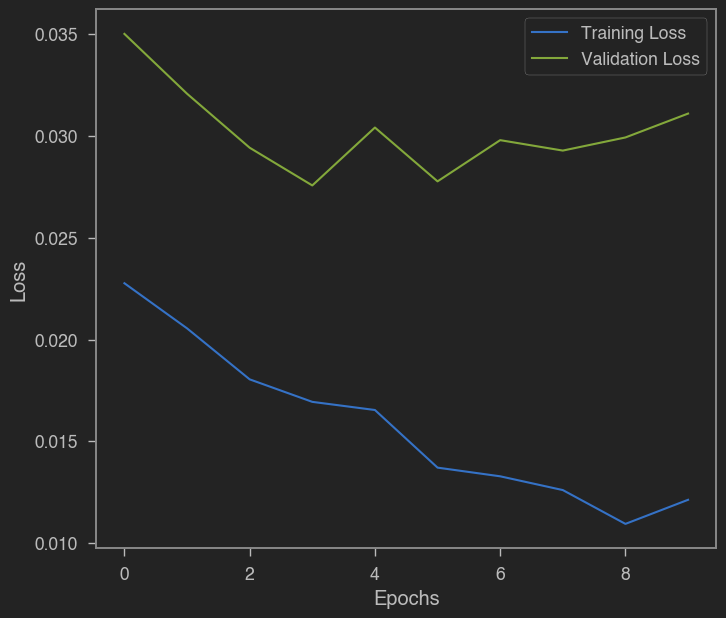

In [35]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
